# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import sys
!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from citipy import citipy

#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
#tempunits = "imperial"

# Build query URL
query_url = url + "&APPID=" + weather_api_key + "&q=" 

In [7]:
query_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a5e7321e0841144adce2b3a841fdf3ca&q='

In [8]:
response = requests.get(query_url).json()
print(json.dumps(response, indent=4))


{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [9]:
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country =[]
Date = []

# Start a counter
city_counter = 1

# Pruint the statemetn to start data acquisition
print(f"Beginning Data Acquisition")
print(f"----------------$$$$$ -------------------")

#Start looping to get each data point for each city

for mainCity in cities:
    
    #try and except methodology in order to make sure if it doesnt find a city, the code does not break
    try:
        response = requests.get(query_url+ mainCity).json()
        City.append(response["name"])
        Country.append(response["sys"]["country"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Date.append(response["dt"])
        
        
        #imput the name of the city in the print statment
        city_selected = response["name"]
        
        print(f"Processing record number {city_counter} | {city_selected}")
        
        # Increase the counter by 1 for each loop
        city_counter += 1
        
    except(KeyError, IndexError):
        print("City not found... go to the next one!!")
        
    

# Close the print statement after data is acquired
print(f" ------$$$$$$ -----")
print(f"Data acquisition finished")
        

Beginning Data Acquisition
----------------$$$$$ -------------------
City not found... go to the next one!!
Processing record number 1 | Novyy Karachay
Processing record number 2 | Biograd na Moru
Processing record number 3 | Te Anau
Processing record number 4 | Port Elizabeth
Processing record number 5 | Narsaq
Processing record number 6 | Pisco
Processing record number 7 | Hermanus
Processing record number 8 | Saint-Philippe
Processing record number 9 | Horní Slavkov
Processing record number 10 | Ust-Nera
Processing record number 11 | Barrow
Processing record number 12 | Tiznit Province
Processing record number 13 | Rikitea
Processing record number 14 | Provideniya
Processing record number 15 | Tasiilaq
Processing record number 16 | Thinadhoo
Processing record number 17 | La Rioja
Processing record number 18 | Livingstonia
City not found... go to the next one!!
Processing record number 19 | Guerrero Negro
Processing record number 20 | Palmer
Processing record number 21 | Kapaa
Proces

Processing record number 191 | Geraldton
Processing record number 192 | Mathbaria
Processing record number 193 | Kabakovo
Processing record number 194 | Sitka
Processing record number 195 | Lagoa
Processing record number 196 | Vila
Processing record number 197 | Synya
Processing record number 198 | Ballina
Processing record number 199 | Tevriz
City not found... go to the next one!!
Processing record number 200 | Laguna
Processing record number 201 | Mount Gambier
Processing record number 202 | Anacortes
Processing record number 203 | Odienné
Processing record number 204 | Nikolskoye
Processing record number 205 | Taltal
Processing record number 206 | Bethel
Processing record number 207 | Ribeira Grande
Processing record number 208 | Warmbad
Processing record number 209 | At-Bashi
Processing record number 210 | Touros
Processing record number 211 | Tignère
Processing record number 212 | Mahon
Processing record number 213 | Yangi Marg`ilon
Processing record number 214 | Kasongo-Lunda
Pro

Processing record number 372 | Kaitangata
Processing record number 373 | Lucea
Processing record number 374 | Safford
Processing record number 375 | Arrondissement du Havre
Processing record number 376 | Omboué
Processing record number 377 | Puri
Processing record number 378 | Leh
Processing record number 379 | Pevek
Processing record number 380 | Kochevo
Processing record number 381 | Sayyan
Processing record number 382 | Tigil'
Processing record number 383 | Katobu
Processing record number 384 | Broome
Processing record number 385 | Timberlake
Processing record number 386 | Alice Springs
Processing record number 387 | Tongliao
Processing record number 388 | Vengerovo
Processing record number 389 | Luau
Processing record number 390 | Berlevåg
Processing record number 391 | Ruwi
Processing record number 392 | Warwick
Processing record number 393 | Krasnosel'kup
City not found... go to the next one!!
Processing record number 394 | Katsuura
Processing record number 395 | Manzhouli
Proces

Processing record number 553 | Yatou
Processing record number 554 | ‘Ewa Beach
Processing record number 555 | Kalmeshwar
Processing record number 556 | San Lucas
Processing record number 557 | Abu Samrah
Processing record number 558 | Kiruna
Processing record number 559 | Alibag
Processing record number 560 | Kroonstad
Processing record number 561 | Banda Aceh
Processing record number 562 | Klyuchi
Processing record number 563 | Yerbogachën
Processing record number 564 | Cap-aux-Meules
Processing record number 565 | Shihezi
Processing record number 566 | San Clemente
Processing record number 567 | Ceres
Processing record number 568 | Abhā
Processing record number 569 | Ofakim
Processing record number 570 | Nelson Bay
Processing record number 571 | Vega de Alatorre
Processing record number 572 | Kwang Binh
Processing record number 573 | Marabu
Processing record number 574 | Mataram
Processing record number 575 | Isla Vista
Processing record number 576 | Inuvik
Processing record number 5

In [10]:
city_info = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date}
city_info_df = pd.DataFrame(city_info)
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Novyy Karachay,43.82,41.90,59.81,41,35,6.06,RU,1603994753
1,Biograd na Moru,43.94,15.45,57.99,100,20,8.86,HR,1603994753
2,Te Anau,-45.42,167.72,52.20,90,97,1.61,NZ,1603994753
3,Port Elizabeth,-33.92,25.57,59.00,87,75,26.40,ZA,1603994754
4,Narsaq,60.92,-46.05,32.00,95,75,2.24,GL,1603994754
...,...,...,...,...,...,...,...,...,...
573,Mataram,-8.58,116.12,79.72,77,85,1.16,ID,1603994981
574,Isla Vista,34.41,-119.86,68.00,45,1,3.36,US,1603994982
575,Inuvik,68.35,-133.72,10.36,95,99,3.42,CA,1603994758
576,Avera,33.19,-82.53,84.20,70,90,16.11,US,1603994982


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_info_df.to_csv(r'../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
HHumidity = city_info_df.loc[city_info_df["Humidity"] > 100, :]
HHumidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

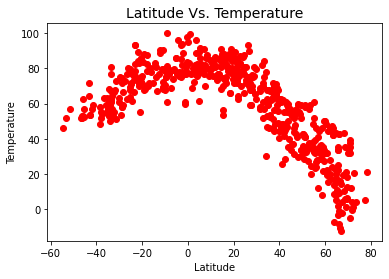

In [15]:
plt.scatter(city_info_df['Lat'], city_info_df['Max Temp'], marker="o", facecolors='red')
plt.title('Latitude Vs. Temperature',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Temperature',fontsize =10)
plt.savefig(r'../output_data/LatVsTemp.png')

## Latitude vs. Humidity Plot

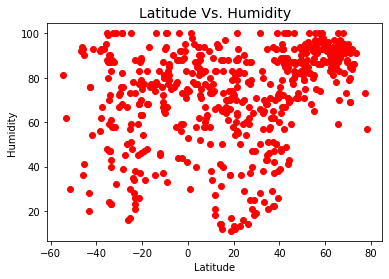

In [16]:
plt.scatter(city_info_df['Lat'], city_info_df['Humidity'], marker="o", facecolors='red')
plt.title('Latitude Vs. Humidity',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)
plt.savefig(r'../output_data/LatVsHumidity.png')

## Latitude vs. Cloudiness Plot

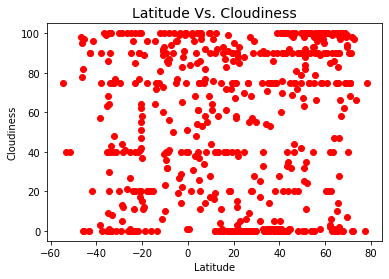

In [17]:
plt.scatter(city_info_df['Lat'], city_info_df['Cloudiness'], marker="o", facecolors='red')
plt.title('Latitude Vs. Cloudiness',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)
plt.savefig(r'../output_data/LatVsCloudiness.png')

## Latitude vs. Wind Speed Plot

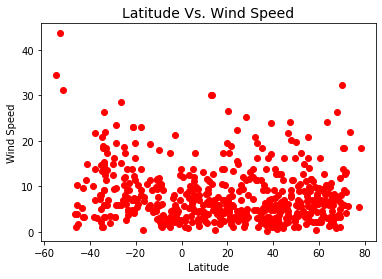

In [18]:
plt.scatter(city_info_df['Lat'], city_info_df['Wind Speed'], marker="o", facecolors='red')
plt.title('Latitude Vs. Wind Speed',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)
plt.savefig(r'../output_data/LatVsWindSpeed.png')

## Linear Regression

In [19]:
N_Hem = city_info_df.loc[city_info_df['Lat'] >= 0,:]
S_Hem = city_info_df.loc[city_info_df['Lat'] < 0,:]
N_Hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Novyy Karachay,43.82,41.90,59.81,41,35,6.06,RU,1603994753
1,Biograd na Moru,43.94,15.45,57.99,100,20,8.86,HR,1603994753
4,Narsaq,60.92,-46.05,32.00,95,75,2.24,GL,1603994754
8,Horní Slavkov,50.14,12.81,43.00,86,0,5.82,CZ,1603994756
9,Ust-Nera,64.57,143.20,8.08,88,100,1.28,RU,1603994756
...,...,...,...,...,...,...,...,...,...
572,Marabu,4.41,114.01,77.00,94,40,5.44,MY,1603994903
574,Isla Vista,34.41,-119.86,68.00,45,1,3.36,US,1603994982
575,Inuvik,68.35,-133.72,10.36,95,99,3.42,CA,1603994758
576,Avera,33.19,-82.53,84.20,70,90,16.11,US,1603994982


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

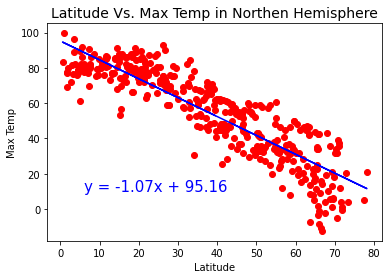

In [23]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Max Temp']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Max Temp in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.savefig(r'../output_data/LatVsmaxtempNorthRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

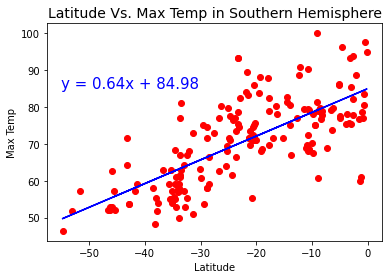

In [41]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Max Temp']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Max Temp in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,85),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsmaxtempSouthRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

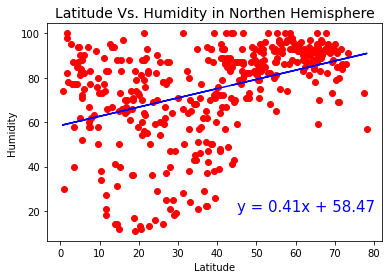

In [36]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Humidity']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Humidity in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsHumidityNorthRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

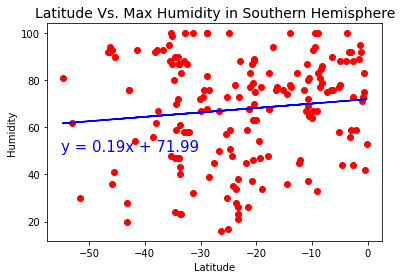

In [46]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Humidity']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values,color='blue')
plt.title('Latitude Vs. Max Humidity in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsHumiditySouthRegression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

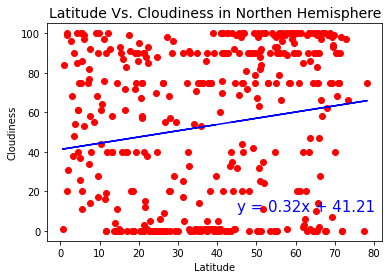

In [48]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Cloudiness']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Cloudiness in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsCloudinessNorthRegression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

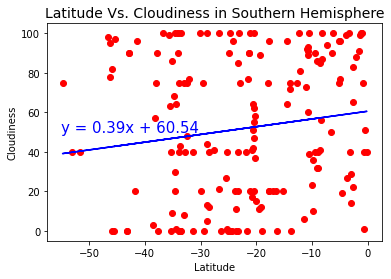

In [49]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Cloudiness']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Cloudiness in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsCloudinessSouthRegression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

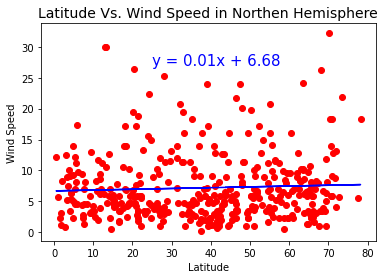

In [53]:
x_valuesN = N_Hem['Lat']
y_valuesN = N_Hem['Wind Speed']

plt.scatter(x_valuesN, y_valuesN, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesN, y_valuesN)
regress_values = x_valuesN *slope +intercept

plt.plot(x_valuesN, regress_values, color='blue')
plt.title('Latitude Vs. Wind Speed in Northen Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,27),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVsWindSpeedNorthRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

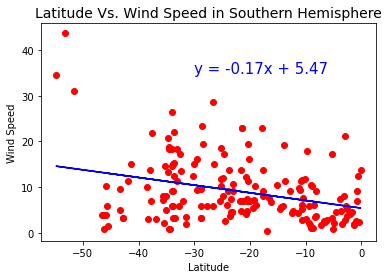

In [55]:
x_valuesS = S_Hem['Lat']
y_valuesS = S_Hem['Wind Speed']

plt.scatter(x_valuesS, y_valuesS, marker="o", facecolors='red')

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_valuesS, y_valuesS)
regress_values = x_valuesS *slope +intercept

plt.plot(x_valuesS, regress_values, color='blue')
plt.title('Latitude Vs. Wind Speed in Southern Hemisphere',fontsize =14)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed',fontsize =10)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,35),fontsize=15,color="blue")

plt.savefig(r'../output_data/LatVswindspeedSouthRegression.png')